## Experimental Boxing data review.ipynb

This notebook contains a review of the (thus far) collected boxing data. Here we inspect the data, perform preprocessing and conduct primary analysis and visualizations. </br>

Eight continuous data measurements were taken, (almost) all of them containing 300 seconds of data measuring up to 150 punches per dataset. Except for the control measurements which meant standing still and moving sligthly without throwing any punches. 

The following features were extrated from *Phyphox* app. 
- Rotation on the x-axis
- Rotation on the y-axis
- Rotation on the z-axis
- Acceleration on the x-axis
- Acceleration on the y-axis
- Acceleration on the z-axis
- Proximity (an experimental measurement which we shan't use)

We decided to exclude barometer as this measures air pressures in Pascal, which is not interesting in the cause of our experiment since we're collecting biometric data. 

![image.png](attachment:fe40c59d-a68b-431e-9f55-204343da9c7f.png)

</br>All Rotation and Acceleration datasets were collected at a sampling rate of **50Hz** (50Hz means that mobile device collects 50 datapoints per second). The decision was made due to the following reasons as the follows:
- Professional (right handed) boxers take 60-100ms to throw a jab; 150-200ms to throw a cross and other punches;
- Considering the fact that we are hobby-level boxers, it will take us (and other junior boxers) a slightly longer time to throw punches;
- This, we assume that it will take us approximately 250ms to throw a punch. Ideally, a sampling frequency of 250Hz shall be able to record a punching behavior whti a high temopral resolution (1ms/datapoint); however, this will result in millions of datapoints which is computationally expensive. Alternatively, we balance this by reducing the temporai resolution to 5ms/datapoint ->50Hz
- According to **Nyquist Shannon Sampling Theorem**, the sampling rate must be twice the analog bandwidth of the incoming signal to record a full-scale event including possible buffers (e.g.: few seconds to reposition your arm). We take twice of the 25Hz -> 50Hz.

In [90]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [91]:
# Change the filepath and dirpath accordingly to the location of datasets on your own device 
subject = "01"
run = "01"
# For naming convenience:
# lh -> Lead Hook
# rh -> Rear Hook
# lu -> Lead Uppercut
# ru -> Rear Uppercut
# acc -> Acceleration
# gyr -> Gyroscope (rotation)
# bar -> Barometer (pressure)
# pre -> preliminary

dirpath_left_nopunch = f"Data/Raw Data/Experimental/leftnopunch_sub-{subject}_run-{run}/"
dirpath_right_nopunch = f"Data/Raw Data/Experimental/rightnopunch_sub-{subject}_run-{run}/"
dirpath_jab = f"Data/Raw Data/Experimental/jab_sub-{subject}_run-{run}/"
dirpath_cross = f"Data/Raw Data/Experimental/cross_sub-{subject}_run-{run}/"
dirpath_lh = f"Data/Raw Data/Experimental/leadhook_sub-{subject}_run-{run}"
dirpath_rh = f"Data/Raw Data/Experimental/rearhook_sub-{subject}_run-{run}/"
dirpath_lu = f"Data/Raw Data/Experimental/leadupper_sub-{subject}_run-{run}/"
dirpath_ru = f"Data/Raw Data/Experimental/rearupper_sub-{subject}_run-{run}/"

dirpath_savefig = "Figures/Experimental Data/"

# Left hand data without punch
left_nopunch_acc = pd.read_csv(os.path.join(dirpath_left_nopunch,"Linear Acceleration.csv"))
left_nopunch_gyr = pd.read_csv(os.path.join(dirpath_left_nopunch,"Gyroscope.csv"))

# Right hand data without punch
right_nopunch_acc = pd.read_csv(os.path.join(dirpath_right_nopunch,"Linear Acceleration.csv"))
right_nopunch_gyr = pd.read_csv(os.path.join(dirpath_right_nopunch,"Gyroscope.csv"))

# Jab data
jab_acc = pd.read_csv(os.path.join(dirpath_jab,"Linear Acceleration.csv"))
jab_gyr = pd.read_csv(os.path.join(dirpath_jab,"Gyroscope.csv"))

# Cross data
cross_acc = pd.read_csv(os.path.join(dirpath_cross,"Linear Acceleration.csv"))
cross_gyr = pd.read_csv(os.path.join(dirpath_cross,"Gyroscope.csv"))

# Lead Hook data
leadhook_acc = pd.read_csv(os.path.join(dirpath_lh,"Linear Acceleration.csv"))
leadhook_gyr = pd.read_csv(os.path.join(dirpath_lh,"Gyroscope.csv"))

# Rear Hook data
rearhook_acc = pd.read_csv(os.path.join(dirpath_rh,"Linear Acceleration.csv"))
rearhook_gyr = pd.read_csv(os.path.join(dirpath_rh,"Gyroscope.csv"))

# Lead Uppercut data
leadupper_acc = pd.read_csv(os.path.join(dirpath_lu,"Linear Acceleration.csv"))
leadupper_gyr = pd.read_csv(os.path.join(dirpath_lu,"Gyroscope.csv"))

# Rear Uppercut data
rearupper_acc = pd.read_csv(os.path.join(dirpath_ru,"Linear Acceleration.csv"))
rearupper_gyr = pd.read_csv(os.path.join(dirpath_ru,"Gyroscope.csv"))
    
# Changing colnames for consistency
acc_columns = {"Linear Acceleration x (m/s^2)" : "X (m/s^2)",
            "Linear Acceleration y (m/s^2)" : "Y (m/s^2)",
            "Linear Acceleration z (m/s^2)" : "Z (m/s^2)"
            }

gyr_columns = {"Gyroscope x (rad/s)" : "X (rad/s)",
            "Gyroscope y (rad/s)" : "Y (rad/s)",
            "Gyroscope z (rad/s)" : "Z (rad/s)"
            }

left_nopunch_acc.rename(columns=acc_columns, inplace=True)
left_nopunch_gyr.rename(columns=gyr_columns, inplace=True)

right_nopunch_acc.rename(columns=acc_columns, inplace=True)
right_nopunch_gyr.rename(columns=gyr_columns, inplace=True)

jab_acc.rename(columns=acc_columns, inplace=True)
jab_gyr.rename(columns=gyr_columns, inplace=True)

cross_acc.rename(columns=acc_columns, inplace=True)
cross_gyr.rename(columns=gyr_columns, inplace=True)

leadhook_acc.rename(columns=acc_columns, inplace=True)
leadhook_gyr.rename(columns=gyr_columns, inplace=True)

rearhook_acc.rename(columns=acc_columns, inplace=True)
rearhook_gyr.rename(columns=gyr_columns, inplace=True)

leadupper_acc.rename(columns=acc_columns, inplace=True)
leadupper_gyr.rename(columns=gyr_columns, inplace=True)

rearupper_acc.rename(columns=acc_columns, inplace=True)
rearupper_gyr.rename(columns=gyr_columns, inplace=True)
    
# Use dictionary to store dataframe for easier preprocessing
dict_sub_0101 = {
    "left_nopunch_acc" : left_nopunch_acc,
    "left_nopunch_gyr" : left_nopunch_gyr,
    "jab_acc" : jab_acc,
    "jab_gyr" : jab_gyr,
    "cross_acc" : cross_acc,
    "cross_gyr" : cross_gyr,
    "leadhook_acc" : leadhook_acc,
    "leadhook_gyr" : leadhook_gyr,
    "rearhook_acc" : rearhook_acc,
    "rearhook_gyr" : rearhook_gyr,
    "leadupper_acc" : leadupper_acc,
    "leadupper_gyr" : leadupper_gyr,
    "rearupper_acc" : rearupper_acc,
    "rearupper_gyr" : rearupper_gyr
}


In [92]:
subject = "03"
run = "01"

dirpath_left_nopunch = f"Data/Raw Data/Experimental/leftnopunch_sub-{subject}_run-{run}/"
dirpath_right_nopunch = f"Data/Raw Data/Experimental/rightnopunch_sub-{subject}_run-{run}/"
dirpath_jab = f"Data/Raw Data/Experimental/jab_sub-{subject}_run-{run}/"
dirpath_cross = f"Data/Raw Data/Experimental/cross_sub-{subject}_run-{run}/"
dirpath_lh = f"Data/Raw Data/Experimental/leadhook_sub-{subject}_run-{run}"
dirpath_rh = f"Data/Raw Data/Experimental/rearhook_sub-{subject}_run-{run}/"
dirpath_lu = f"Data/Raw Data/Experimental/leaduppercut_sub-{subject}_run-{run}/"
dirpath_ru = f"Data/Raw Data/Experimental/rearuppercut_sub-{subject}_run-{run}/"

# Left hand data without punch
left_nopunch_acc = pd.read_csv(os.path.join(dirpath_left_nopunch,"Linear Accelerometer.csv"))
left_nopunch_gyr = pd.read_csv(os.path.join(dirpath_left_nopunch,"Gyroscope.csv"))

# Right hand data without punch
right_nopunch_acc = pd.read_csv(os.path.join(dirpath_right_nopunch,"Linear Accelerometer.csv"))
right_nopunch_gyr = pd.read_csv(os.path.join(dirpath_right_nopunch,"Gyroscope.csv"))

# Jab data
jab_acc = pd.read_csv(os.path.join(dirpath_jab,"Linear Accelerometer.csv"))
jab_gyr = pd.read_csv(os.path.join(dirpath_jab,"Gyroscope.csv"))

# Cross data
cross_acc = pd.read_csv(os.path.join(dirpath_cross,"Linear Accelerometer.csv"))
cross_gyr = pd.read_csv(os.path.join(dirpath_cross,"Gyroscope.csv"))

# Lead Hook data
leadhook_acc = pd.read_csv(os.path.join(dirpath_lh,"Linear Accelerometer.csv"))
leadhook_gyr = pd.read_csv(os.path.join(dirpath_lh,"Gyroscope.csv"))

# Rear Hook data
rearhook_acc = pd.read_csv(os.path.join(dirpath_rh,"Linear Accelerometer.csv"))
rearhook_gyr = pd.read_csv(os.path.join(dirpath_rh,"Gyroscope.csv"))

# Lead Uppercut data
leadupper_acc = pd.read_csv(os.path.join(dirpath_lu,"Linear Accelerometer.csv"))
leadupper_gyr = pd.read_csv(os.path.join(dirpath_lu,"Gyroscope.csv"))

# Rear Uppercut data
rearupper_acc = pd.read_csv(os.path.join(dirpath_ru,"Linear Accelerometer.csv"))
rearupper_gyr = pd.read_csv(os.path.join(dirpath_ru,"Gyroscope.csv"))

# Use dictionary to store dataframe for easier preprocessing
dict_sub_0301 = {
    "left_nopunch_acc" : left_nopunch_acc,
    "left_nopunch_gyr" : left_nopunch_gyr,
    "jab_acc" : jab_acc,
    "jab_gyr" : jab_gyr,
    "cross_acc" : cross_acc,
    "cross_gyr" : cross_gyr,
    "leadhook_acc" : leadhook_acc,
    "leadhook_gyr" : leadhook_gyr,
    "rearhook_acc" : rearhook_acc,
    "rearhook_gyr" : rearhook_gyr,
    "leadupper_acc" : leadupper_acc,
    "leadupper_gyr" : leadupper_gyr,
    "rearupper_acc" : rearupper_acc,
    "rearupper_gyr" : rearupper_gyr
}


## 1. Quick Inspection of Raw Data

In [93]:
jab_acc

,Time (s),X (m/s^2),Y (m/s^2),Z (m/s^2)
0,0.002655,0.392028,-0.172775,0.360865
1,0.022655,0.341059,-0.150944,0.235687
2,0.042655,0.309618,-0.052570,0.025728
3,0.062654,0.363324,-0.054409,0.075123
4,0.082654,0.396303,-0.059997,0.234904
...,...,...,...,...
15002,300.049816,-0.040315,0.205825,-0.158829
15003,300.069817,-0.095965,0.324921,-0.230413
15004,300.089817,-0.412720,0.373484,-0.136968
15005,300.109818,-0.593154,0.357377,0.146485


In [94]:
jab_gyr

,Time (s),X (rad/s),Y (rad/s),Z (rad/s)
0,0.002655,0.024320,0.089832,0.083275
1,0.022655,0.006149,0.080580,0.062872
2,0.042655,-0.019618,0.090134,0.051440
3,0.062654,-0.035330,0.092124,0.045177
4,0.082654,-0.051250,0.087529,0.034938
...,...,...,...,...
15002,300.049816,-0.087155,0.103793,-0.200508
15003,300.069817,-0.092551,0.224128,-0.227623
15004,300.089817,-0.117639,0.439048,-0.306708
15005,300.109818,-0.098332,0.795755,-0.418347


In [95]:
left_nopunch_acc

,Time (s),X (m/s^2),Y (m/s^2),Z (m/s^2)
0,0.006635,0.073649,0.026824,0.050321
1,0.026637,0.127218,0.038527,0.051068
2,0.046639,0.129690,0.109351,0.094844
3,0.066640,0.082947,0.100397,0.105293
4,0.086642,0.068706,0.025649,0.086862
...,...,...,...,...
14993,299.920794,0.851116,-0.062545,-0.409362
14994,299.940799,0.725113,-0.033437,-0.172831
14995,299.960804,0.526879,0.142898,0.137965
14996,299.980809,0.124750,0.364921,0.776584


In [96]:
left_nopunch_gyr

,Time (s),X (rad/s),Y (rad/s),Z (rad/s)
0,0.006635,0.020207,0.008754,-0.027662
1,0.026637,0.015287,0.028910,-0.035434
2,0.046639,0.017387,0.019522,-0.041733
3,0.066640,0.023963,0.001547,-0.043232
4,0.086642,0.034330,-0.002058,-0.038290
...,...,...,...,...
14993,299.920794,0.159861,0.086715,-0.384416
14994,299.940799,0.171837,0.091364,-0.430923
14995,299.960804,0.141244,0.146105,-0.503278
14996,299.980809,0.101150,0.221446,-0.600534


In [97]:
# Statistical summary of raw data 
for exp_data in dict_sub_0301.keys():
    print(f"{exp_data}:")
    print(dict_sub_0301[exp_data].describe())

left_nopunch_acc:
           Time (s)     X (m/s^2)     Y (m/s^2)     Z (m/s^2)
count  14998.000000  14998.000000  14998.000000  14998.000000
mean     150.000439      0.121684      0.092439      0.083446
std       86.609792      0.763948      0.565338      0.715196
min        0.006635     -5.782930     -3.783602     -3.009726
25%       75.001077     -0.262317     -0.239111     -0.424188
50%      149.998995      0.174127      0.066830      0.066590
75%      224.998964      0.575315      0.392846      0.557784
max      300.000813      3.625616      3.982844      3.818648
left_nopunch_gyr:
           Time (s)     X (rad/s)     Y (rad/s)     Z (rad/s)
count  14998.000000  14998.000000  14998.000000  14998.000000
mean     150.000439      0.002382      0.003575      0.001599
std       86.609792      0.604160      0.269871      0.306860
min        0.006635     -2.561348     -1.254579     -1.204612
25%       75.001077     -0.402870     -0.178795     -0.203959
50%      149.998995     -0.013493 

In [98]:
dict_sub0101_no_time = dict()
dict_sub0301_no_time = dict()

for data in dict_sub_0101.keys():
    no_time_key = data + "_noTime"
    
    no_time_df = dict_sub_0101[data].drop("Time (s)", axis=1)
    dict_sub0101_no_time.setdefault(no_time_key, no_time_df)
    
    no_time_df = dict_sub_0301[data].drop('Time (s)', axis=1)
    dict_sub0301_no_time.setdefault(no_time_key, no_time_df)
    

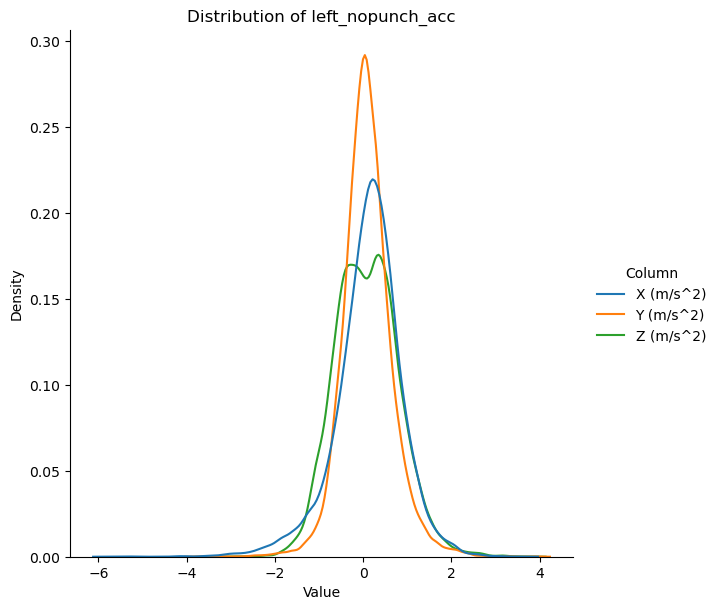

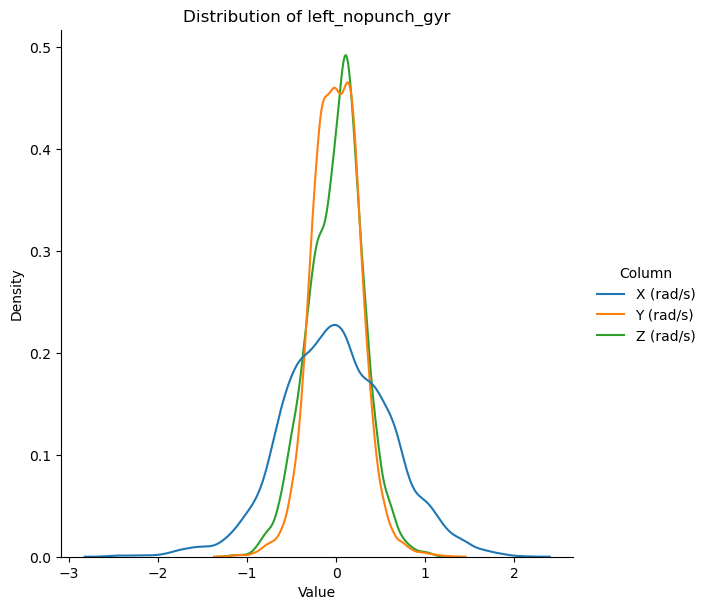

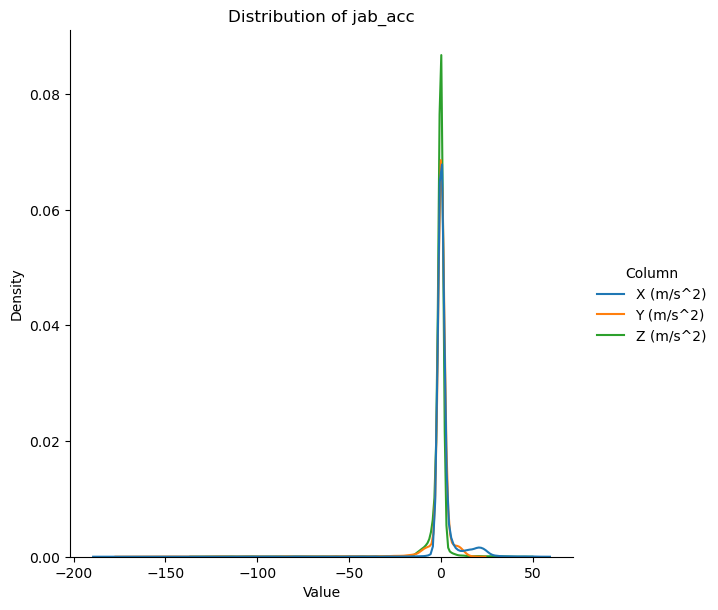

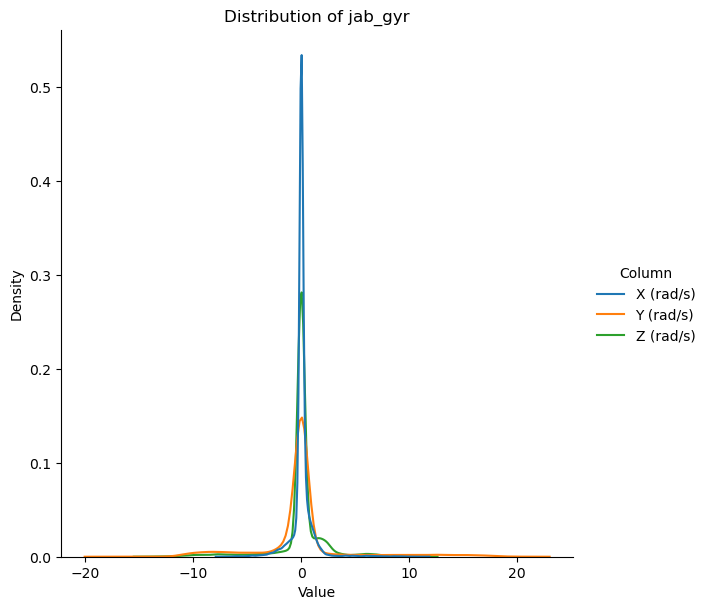

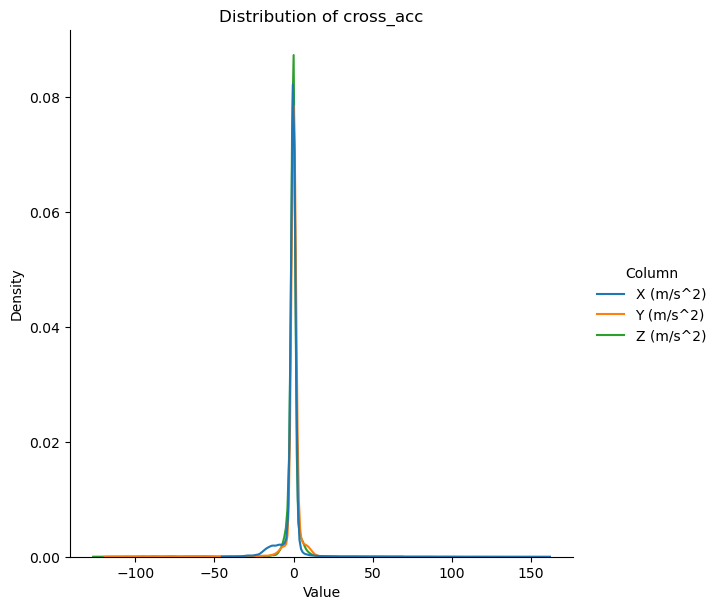

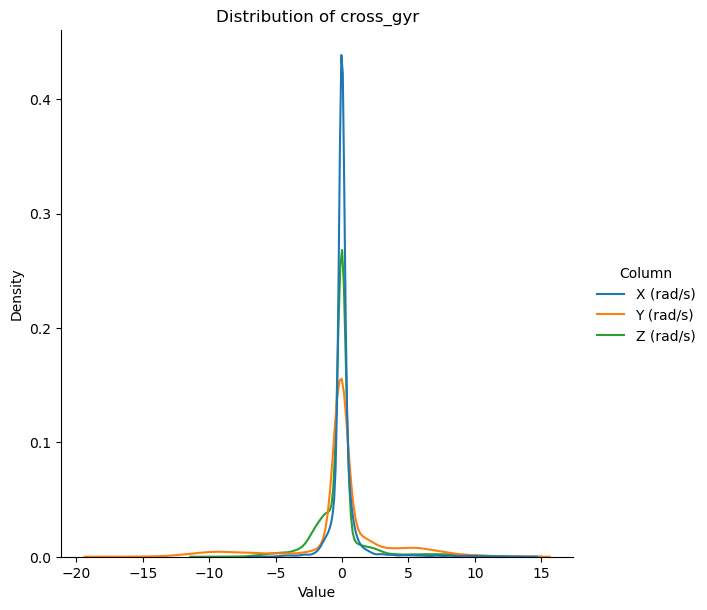

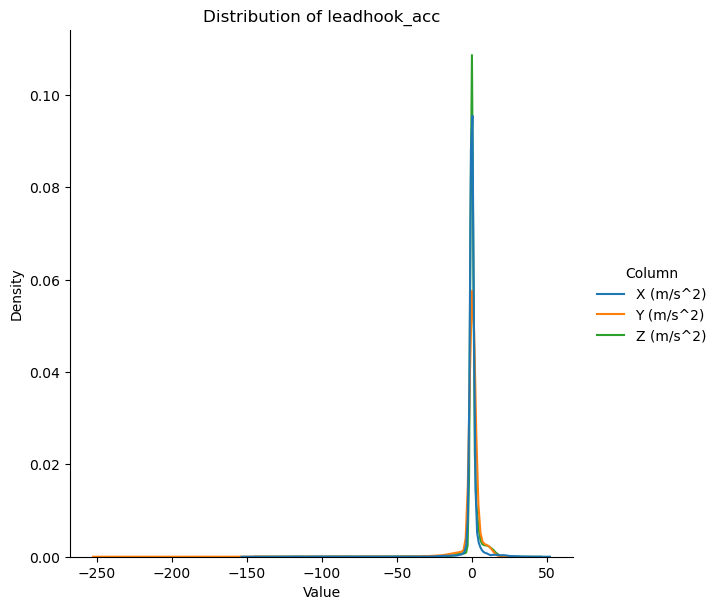

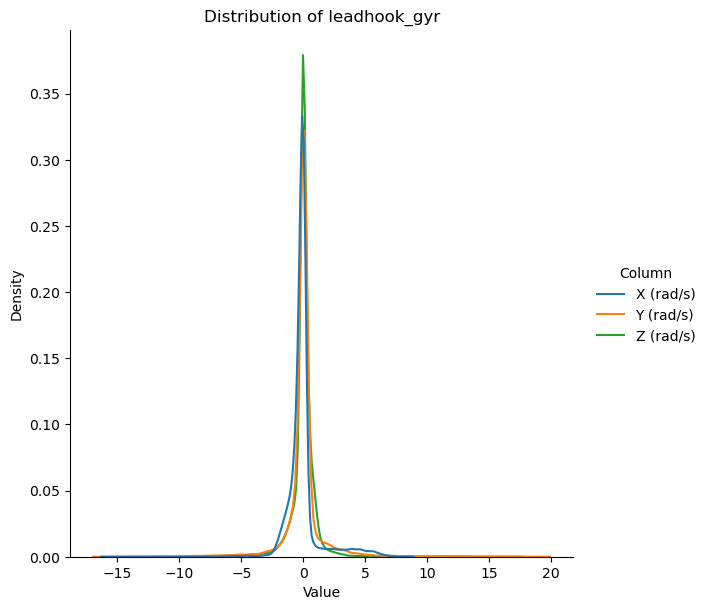

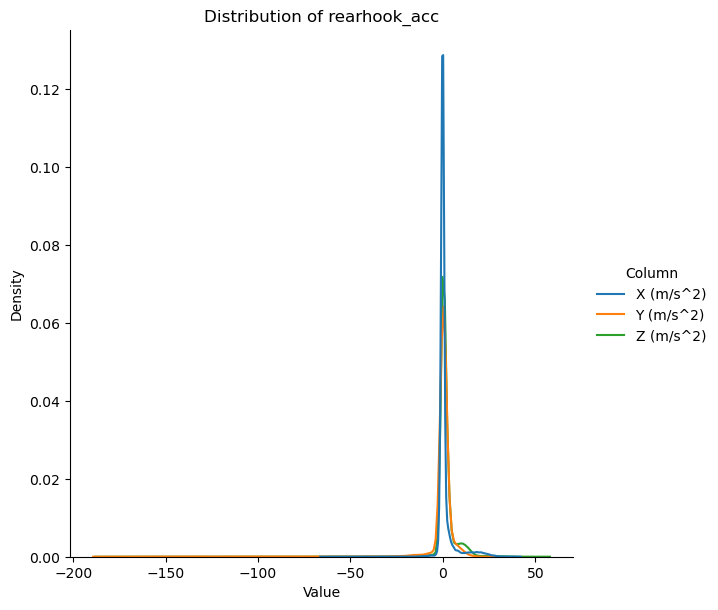

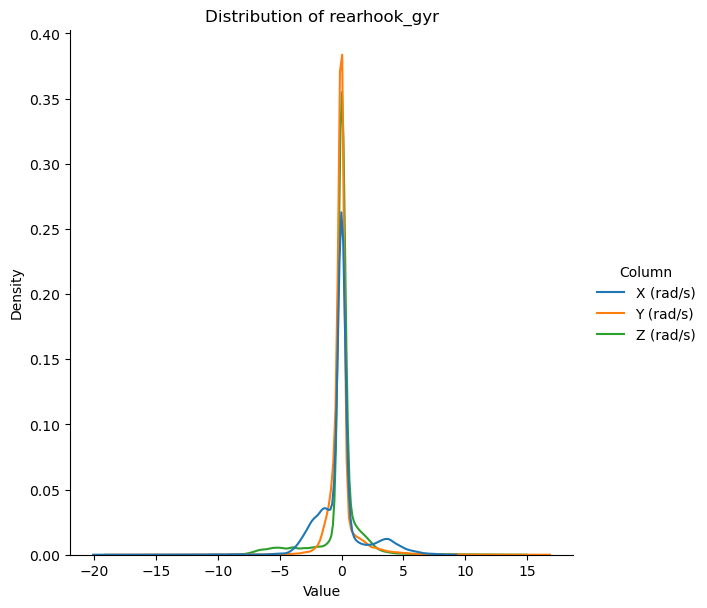

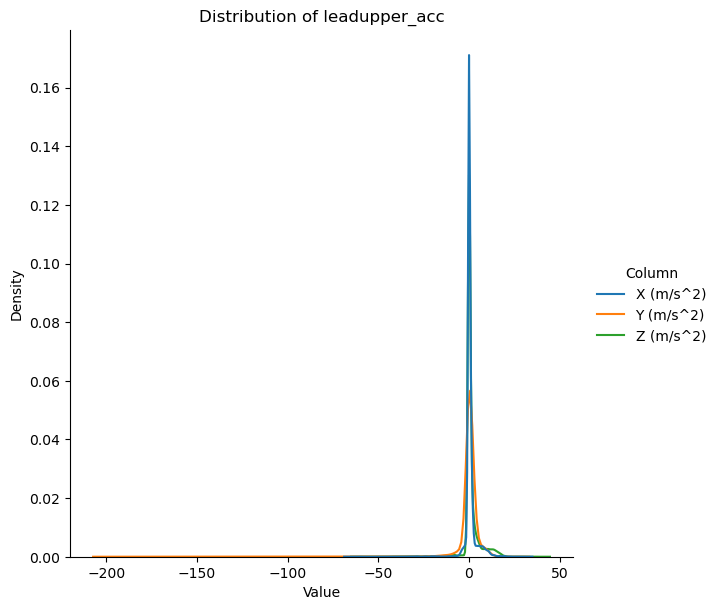

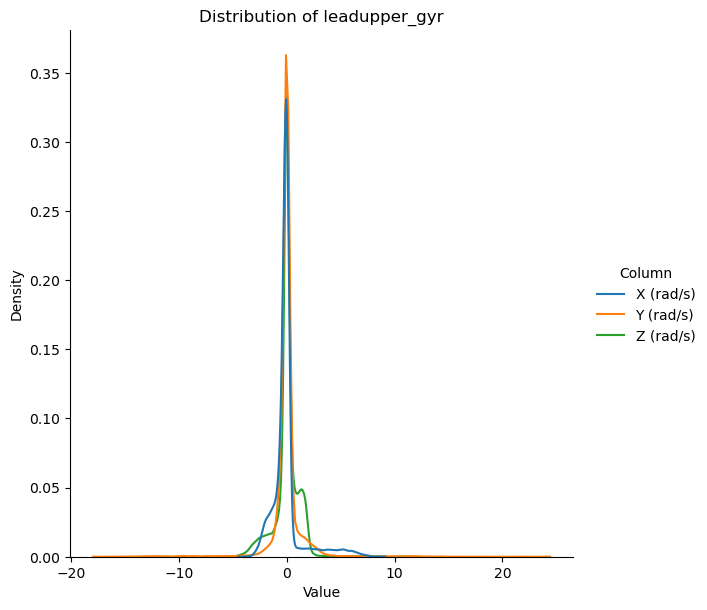

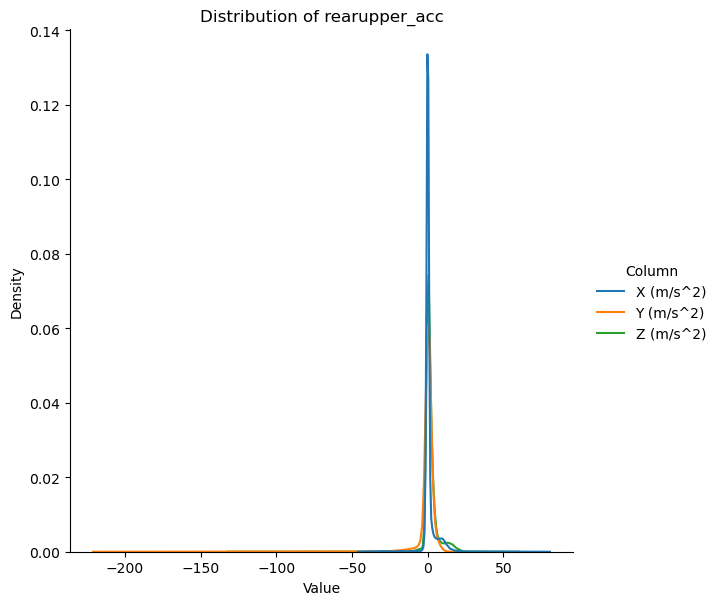

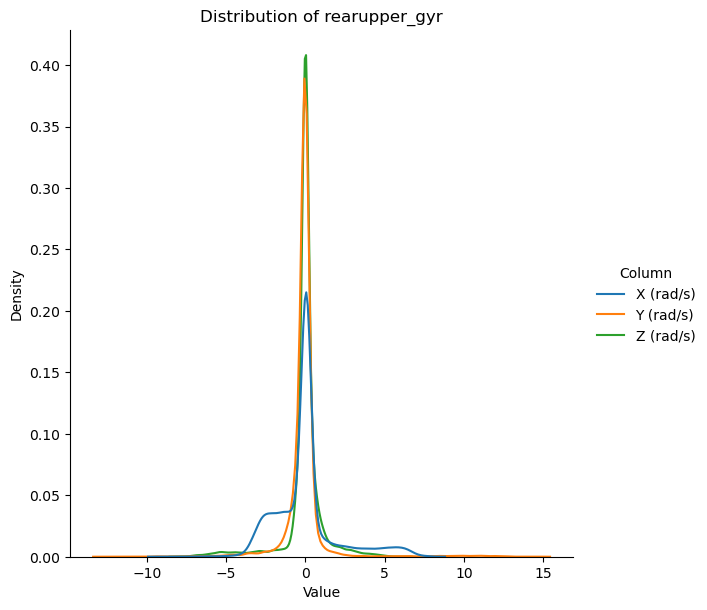

In [99]:
# Plot the distributions
for data in dict_sub0301_no_time.keys():
    df_melted = dict_sub0301_no_time[data].melt(var_name='Column', value_name='Value')

    sns.displot(df_melted, x='Value', hue='Column', kind='kde', height=6, aspect=1)
    
    plt.xlabel('Value')
    plt.ylabel('Density')
    plt.title(f'Distribution of {data.replace("_noTime", "")}')
    plt.show()

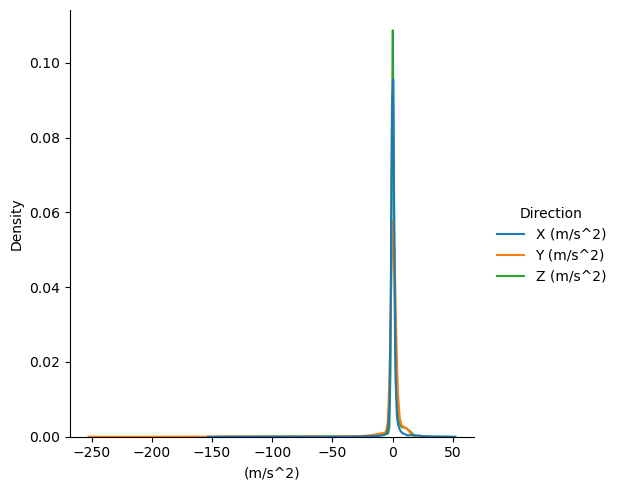

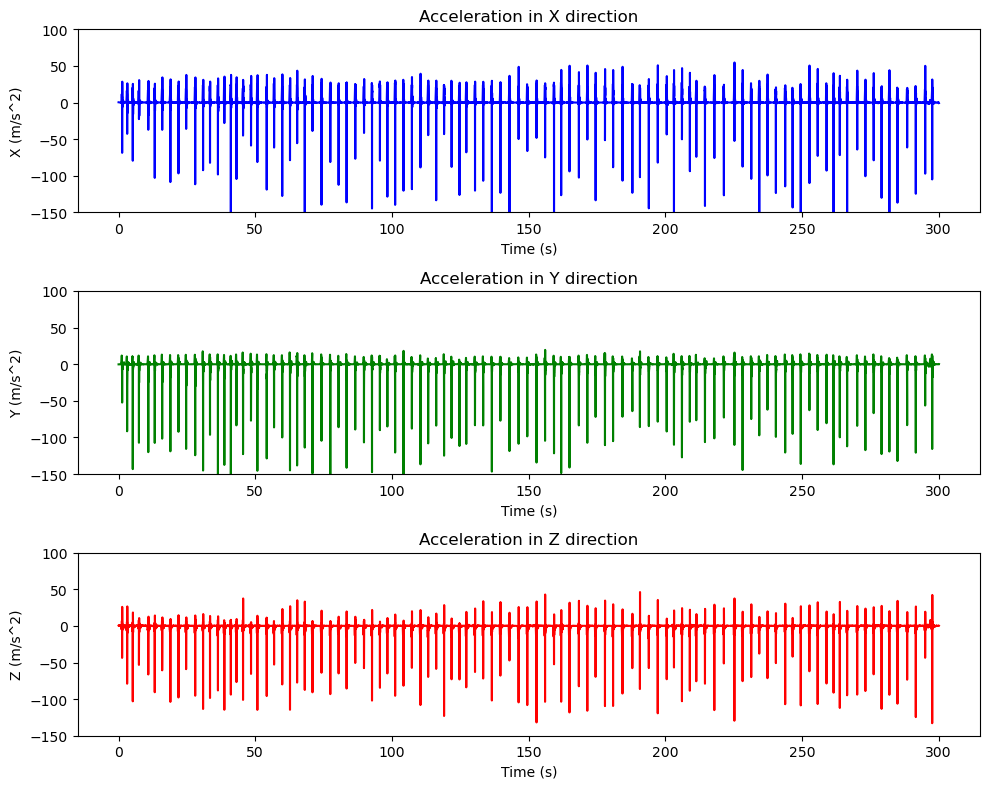

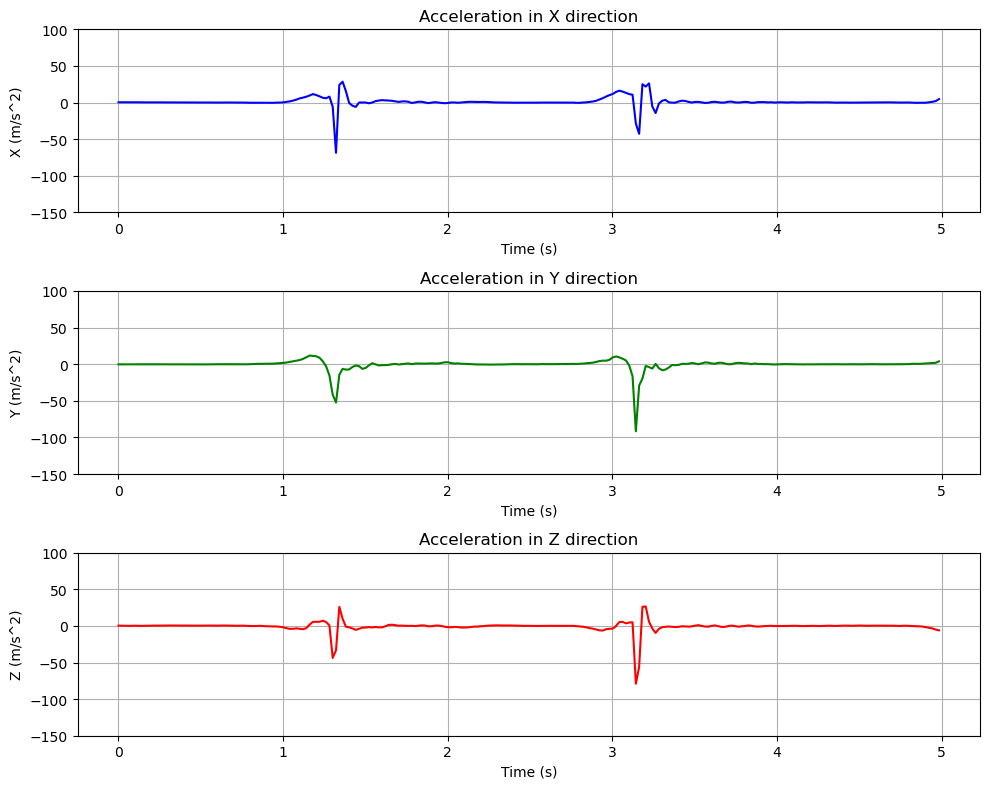

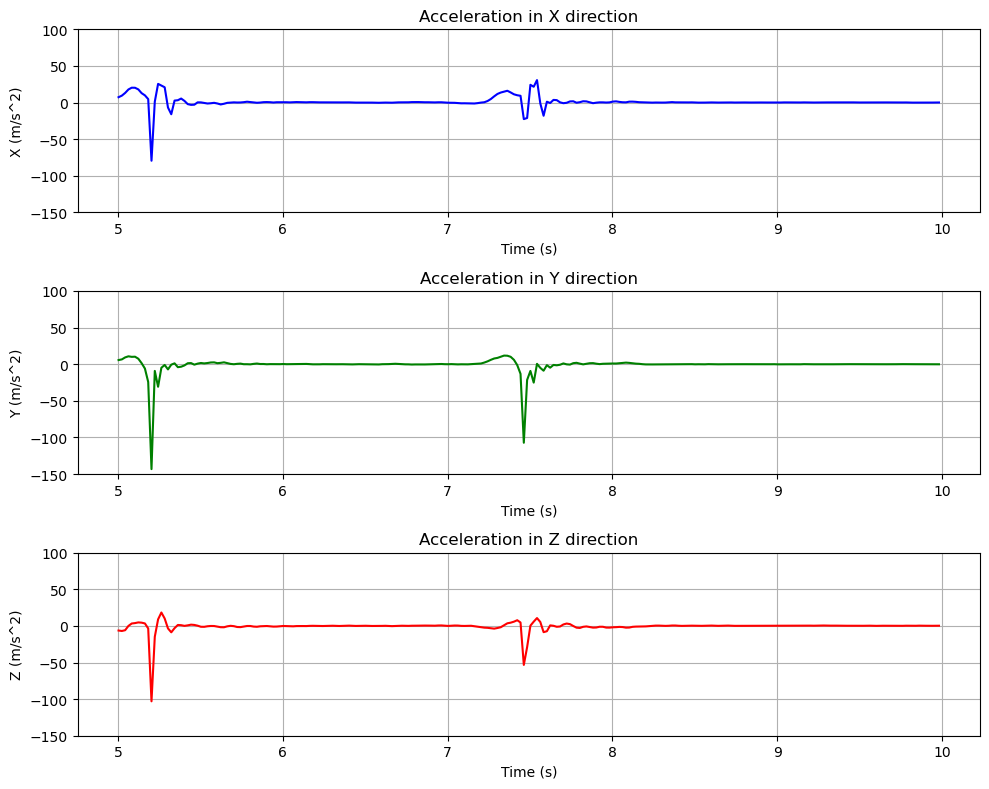

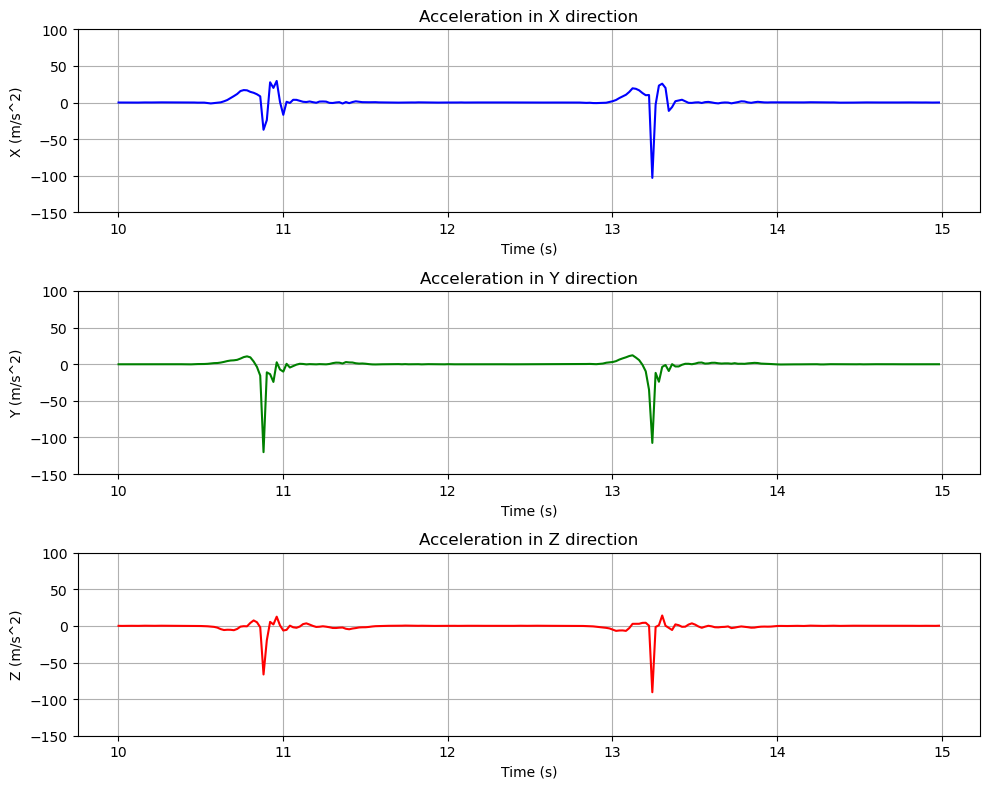

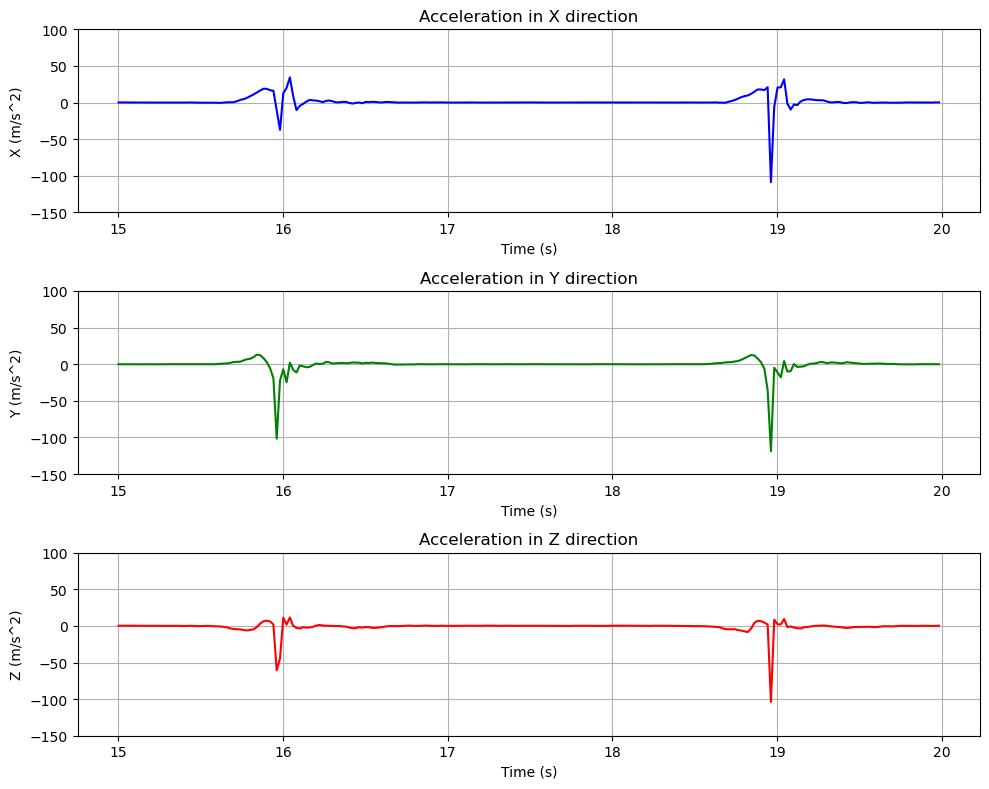

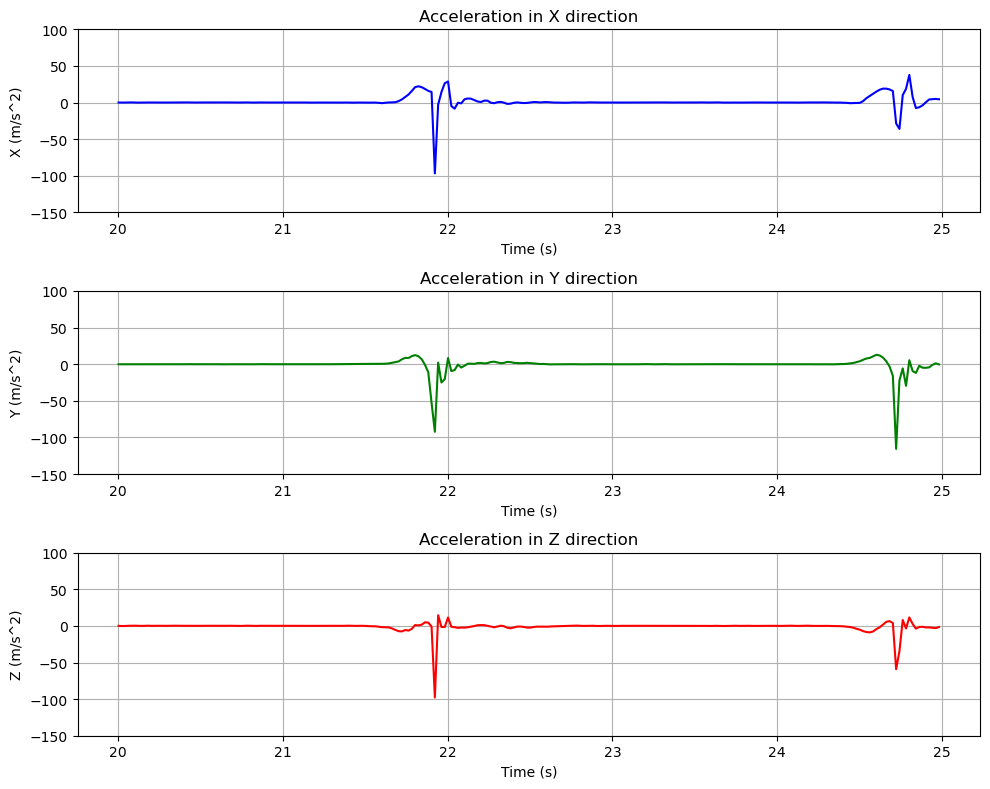

In [100]:
# Look at acceleration per second for 5 seconds
# The jab
# Plot for X (m/s^2)

df_melted = dict_sub0301_no_time["leadhook_acc_noTime"].melt(var_name="Direction", value_name="(m/s^2)")
sns.displot(df_melted, x="(m/s^2)", hue="Direction", kind="kde")

x = jab_acc["Time (s)"]
y_x = jab_acc["X (m/s^2)"]
y_y = jab_acc["Y (m/s^2)"]
y_z = jab_acc["Z (m/s^2)"]

# Create subplots
fig, axs = plt.subplots(3, 1, figsize=(10, 8))

# Plot for X (m/s^2)
axs[0].plot(x, y_x, color='b')
axs[0].set_title('Acceleration in X direction')
axs[0].set_ylim(-150,100)
axs[0].set_xlabel('Time (s)')
axs[0].set_ylabel('X (m/s^2)')

# Plot for Y (m/s^2)
axs[1].plot(x, y_y, color='g')
axs[1].set_title('Acceleration in Y direction')
axs[1].set_ylim(-150,100)
axs[1].set_xlabel('Time (s)')
axs[1].set_ylabel('Y (m/s^2)')

# Plot for Z (m/s^2)
axs[2].plot(x, y_z, color='r')
axs[2].set_title('Acceleration in Z direction')
axs[2].set_ylim(-150,100)
axs[2].set_xlabel('Time (s)')
axs[2].set_ylabel('Z (m/s^2)')

plt.tight_layout()

# plt.savefig(os.path.join("Series of Acceleration of Jab"))
plt.show()

for second in range(0,5):
    start = second * 250
    end = (second + 1) * 250
    
    fig, axs = plt.subplots(3, 1, figsize=(10, 8))
    
    axs[0].plot(x[start:end], y_x[start:end], color='b')
    axs[0].set_title('Acceleration in X direction')
    axs[0].set_ylim(-150,100)
    axs[0].set_xlabel('Time (s)')
    axs[0].set_ylabel('X (m/s^2)')
    axs[0].grid(True)

    # Plot for Y (m/s^2)
    axs[1].plot(x[start:end], y_y[start:end], color='g')
    axs[1].set_title('Acceleration in Y direction')
    axs[1].set_ylim(-150,100)
    axs[1].set_xlabel('Time (s)')
    axs[1].set_ylabel('Y (m/s^2)')
    axs[1].grid(True)

    # Plot for Z (m/s^2)
    axs[2].plot(x[start:end], y_z[start:end], color='r')
    axs[2].set_title('Acceleration in Z direction')
    axs[2].set_ylim(-150,100)
    axs[2].set_xlabel('Time (s)')
    axs[2].set_ylabel('Z (m/s^2)')
    axs[2].grid(True)

    plt.tight_layout()
    # plt.savefig(os.path.join(dirpath_savefig, f"Series of Acceleration of Jab in second {second + 1}"))
    plt.show()

## 2.1 Data Aggregation

In [101]:
def aggregate_data(df):

    """
    returns an aggregated dataframe on a window of 50 datapoints. Discard the remainders that have less than 50 datapoints.
    :param df: The Raw Data
    :returns df_agg: A dataframe with features aggregated.
    """

    # Make a copy of the original df, remove the remaining window that are less than 50 (this can happen due to the device)
    len_df = len(df) // 50 * 50
    df_copy = df[:len_df].copy()
    df_colnames = df_copy.columns

    # Make a template of aggregated df
    df_agg = {
        df_colnames[0]: [],
        df_colnames[1]: [],
        df_colnames[2]: [],        
    }
        
    i = 0
    j = 50

    # Calculate the mean of absolute values of each window (every 50 datapoints)
    # All mean values will be rounded to 3 decimals
    while j <= len_df:
        df_window = df_copy[i:j]
        agg_values = []
        
        for col in df_window:
            agg_values.append(df_window[col].abs().mean())

        df_agg[df_colnames[0]].append(agg_values[0].round(3))
        df_agg[df_colnames[1]].append(agg_values[1].round(3))
        df_agg[df_colnames[2]].append(agg_values[2].round(3))
            
            
        i += 50
        j += 50

    # Convert aggregated values into a dataframe
    df_agg = pd.DataFrame(df_agg)

    return df_agg

In [102]:
sub0301_jab_df = aggregate_data(dict_sub0301_no_time["jab_acc_noTime"])
sub0301_jab_df

,X (m/s^2),Y (m/s^2),Z (m/s^2)
0,0.178,0.215,0.364
1,5.478,5.514,4.244
2,0.928,0.885,1.217
3,5.703,5.364,5.250
4,0.317,0.324,0.583
...,...,...,...
295,5.760,4.995,3.232
296,1.115,2.396,1.584
297,6.969,7.555,6.099
298,0.493,0.850,0.485


In [103]:
# Convert all dataframe except the barometer

dict_sub0101_agg = dict()
dict_sub0301_agg = dict()

for data in dict_sub0301_no_time.keys():
    
    if "_bar_" not in data:
        key_data = data.replace("_noTime","_agg")
        value_data = aggregate_data(dict_sub0101_no_time[data])
        dict_sub0101_agg.setdefault(key_data, value_data)
        
        key_data = data.replace("_noTime","_agg")
        value_data = aggregate_data(dict_sub0301_no_time[data])
        dict_sub0301_agg.setdefault(key_data, value_data)
        
    else:
        dict_sub0101_agg.setdefault(data.replace("_noTime", "_agg"), dict_sub0101_no_time[data])
        dict_sub0301_agg.setdefault(data.replace("_noTime", "_agg"), dict_sub0301_no_time[data])


dict_sub0301_agg

{'left_nopunch_acc_agg':      X (m/s^2)  Y (m/s^2)  Z (m/s^2)
 0        0.279      0.777      0.234
 1        1.162      2.062      1.249
 2        0.561      0.500      1.099
 3        0.776      1.230      0.935
 4        0.795      0.656      1.136
 ..         ...        ...        ...
 294      0.329      0.184      0.368
 295      0.224      0.143      0.330
 296      0.238      0.267      0.277
 297      0.396      0.357      0.460
 298      0.345      0.316      0.477
 
 [299 rows x 3 columns],
 'left_nopunch_gyr_agg':      X (rad/s)  Y (rad/s)  Z (rad/s)
 0        0.717      0.389      0.275
 1        1.187      0.269      0.402
 2        0.604      0.224      0.279
 3        1.149      0.334      0.396
 4        0.717      0.260      0.241
 ..         ...        ...        ...
 294      0.449      0.250      0.201
 295      0.081      0.100      0.086
 296      0.425      0.258      0.187
 297      0.273      0.242      0.139
 298      0.588      0.285      0.276
 
 [299 rows 

## 2.2 Data Transformation and Labeling 

In [104]:
# Concatinate the features to the same punch type
dict_sub0101_transformed = dict()
dict_sub0301_transformed = dict()
punch_types = ['left_nopunch', 'right_nopunch','jab','cross', 'leadhook', 'rearhook', 'leadupper','rearupper']

i = 0
j = 3
idx_punch_types = 0
while j <= 15:
    concat_df = pd.concat([df for df in [feature_df for feature_df in dict_sub0101_agg.values()][i:j]], axis=1)
    dict_sub0101_transformed.setdefault("transformed_" + punch_types[idx_punch_types], concat_df)
    
    concat_df = pd.concat([df for df in [feature_df for feature_df in dict_sub0301_agg.values()][i:j]], axis=1)
    dict_sub0301_transformed.setdefault("transformed_" + punch_types[idx_punch_types], concat_df)
    i += 3
    j += 3
    idx_punch_types += 1

dict_sub0301_transformed

{'transformed_left_nopunch':      X (m/s^2)  Y (m/s^2)  Z (m/s^2)  X (rad/s)  Y (rad/s)  Z (rad/s)  \
 0        0.279      0.777      0.234      0.717      0.389      0.275   
 1        1.162      2.062      1.249      1.187      0.269      0.402   
 2        0.561      0.500      1.099      0.604      0.224      0.279   
 3        0.776      1.230      0.935      1.149      0.334      0.396   
 4        0.795      0.656      1.136      0.717      0.260      0.241   
 ..         ...        ...        ...        ...        ...        ...   
 295      0.224      0.143      0.330      0.081      0.100      0.086   
 296      0.238      0.267      0.277      0.425      0.258      0.187   
 297      0.396      0.357      0.460      0.273      0.242      0.139   
 298      0.345      0.316      0.477      0.588      0.285      0.276   
 299        NaN        NaN        NaN        NaN        NaN        NaN   
 
      X (m/s^2)  Y (m/s^2)  Z (m/s^2)  
 0        0.178      0.215      0.364  
 1

In [105]:
print(dict_sub0101_transformed["transformed_jab"].head())
print(dict_sub0301_transformed["transformed_jab"].head())

   X (m/s^2)  Y (m/s^2)  Z (m/s^2)  X (rad/s)  Y (rad/s)  Z (rad/s)  \
0      3.172      2.219      1.307      0.743      1.582      1.555   
1      4.981     13.393      9.886      3.123      1.779      1.696   
2      4.586      8.017      9.102      1.364      2.273      2.530   
3      2.204      7.133      1.818      1.241      1.032      1.283   
4      5.647     11.289      7.285      1.689      2.633      2.837   

   X (m/s^2)  Y (m/s^2)  Z (m/s^2)  
0      6.082     11.275     14.494  
1      2.984      4.833      1.430  
2      6.707     15.264     12.738  
3      1.271      0.338      0.343  
4      4.595     14.627     10.114  
   X (m/s^2)  Y (m/s^2)  Z (m/s^2)  X (rad/s)  Y (rad/s)  Z (rad/s)  \
0      0.163      0.659      0.427      0.256      0.106      0.133   
1      2.568      9.398      7.955      1.385      2.644      0.930   
2      0.199      0.367      0.131      0.231      0.252      0.150   
3      3.714      9.132      7.237      2.134      2.372      0.897

In [106]:
# label the data 
# There are missing values in Barometers due to the measurement limitation. We firstly try to fill them in by mean

def dataframe_labeller(df,label):
    df["Punch Type"] = label

for idx, df_name in enumerate(dict_sub0301_transformed):
    dataframe_labeller(dict_sub0101_transformed[df_name], punch_types[idx])
    dataframe_labeller(dict_sub0301_transformed[df_name], punch_types[idx])


dict_sub0301_transformed

{'transformed_left_nopunch':      X (m/s^2)  Y (m/s^2)  Z (m/s^2)  X (rad/s)  Y (rad/s)  Z (rad/s)  \
 0        0.279      0.777      0.234      0.717      0.389      0.275   
 1        1.162      2.062      1.249      1.187      0.269      0.402   
 2        0.561      0.500      1.099      0.604      0.224      0.279   
 3        0.776      1.230      0.935      1.149      0.334      0.396   
 4        0.795      0.656      1.136      0.717      0.260      0.241   
 ..         ...        ...        ...        ...        ...        ...   
 295      0.224      0.143      0.330      0.081      0.100      0.086   
 296      0.238      0.267      0.277      0.425      0.258      0.187   
 297      0.396      0.357      0.460      0.273      0.242      0.139   
 298      0.345      0.316      0.477      0.588      0.285      0.276   
 299        NaN        NaN        NaN        NaN        NaN        NaN   
 
      X (m/s^2)  Y (m/s^2)  Z (m/s^2)    Punch Type  
 0        0.178      0.215  

In [107]:
# Save the transformed dataframe to local
destination_dirpath_0101 = f"Data/Preprocessed Data/Experimental/Subject 01 Run 01" # Change the destination path manually if needed
destination_dirpath_0301 = f"Data/Preprocessed Data/Experimental/Subject 03 Run 01" # Change the destination path manually if needed
# os.chdir(destination_dirpath)

# Create path it if doesn't exist
if not os.path.exists(destination_dirpath_0101):
    os.makedirs(destination_dirpath_0101)
if not os.path.exists(destination_dirpath_0301):
    os.makedirs(destination_dirpath_0301)

for df_name, df in dict_sub0101_transformed.items():
    df.to_csv(os.path.join(destination_dirpath_0101, f"{df_name}.csv"),index=False)
for df_name, df in dict_sub0301_transformed.items():
    df.to_csv(os.path.join(destination_dirpath_0301, f"{df_name}.csv"),index=False)

<Axes: >

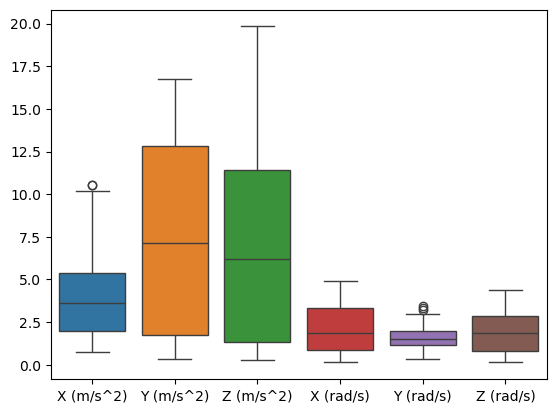

In [108]:
sns.boxplot(dict_sub0101_transformed["transformed_jab"])


<Axes: >

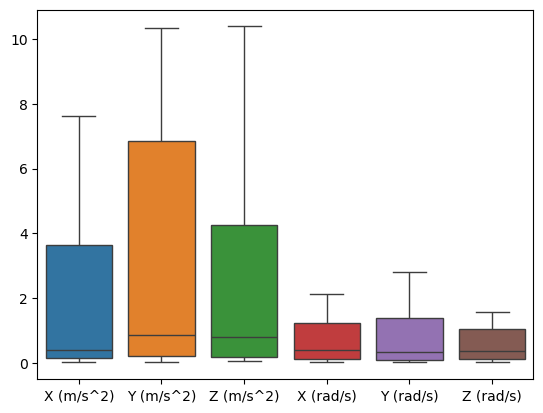

In [109]:
sns.boxplot(dict_sub0301_transformed["transformed_jab"])